In [1]:
## import libraries
import json
import requests # for making http request in python 
import pandas as pd # it an open_source data manipulation and analysis library in python  
from datetime import datetime # this module helps classes work with data and time  
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization

In [5]:
# Extractimg data from OPEN WEATHER API (https://openweathermap.org/api) - link to the website 
api_k = "**********************8" # this is not the original key. Input the key given you from the website.  
city = "Accra,GH"
url = f"http://api.openweathermap.org/data/2.5/forecast/?q={city}&cnt=240&appid={api_k}"
response = requests.get(url)

In [7]:
data = response.json()
json_str = json.dumps(data,indent=4)
print(json_str)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1737028800,
            "main": {
                "temp": 304.38,
                "feels_like": 310.15,
                "temp_min": 303.58,
                "temp_max": 304.38,
                "pressure": 1009,
                "sea_level": 1009,
                "grnd_level": 1006,
                "humidity": 66,
                "temp_kf": 0.8
            },
            "weather": [
                {
                    "id": 801,
                    "main": "Clouds",
                    "description": "few clouds",
                    "icon": "02d"
                }
            ],
            "clouds": {
                "all": 20
            },
            "wind": {
                "speed": 3.94,
                "deg": 184,
                "gust": 3.42
            },
            "visibility": 10000,
            "pop": 0.09,
            "sys": {
                "pod": "d"
            },
       

In [9]:
# TRANSFORMATION STAGE 
def kelvin_to_celcuis(temp_k):
    return temp_k - 273.15

In [11]:
if response.status_code == 200:
    data = response.json()
    weather_data = []
    for hour in data['list']:
        date_time = datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')
        temp = kelvin_to_celcuis(hour['main']['temp'])
        feels_like = kelvin_to_celcuis(hour['main']['feels_like'])
        pressure = hour['main']['pressure']
        humidity = hour['main']['humidity']
        weather_main = hour['weather'][0]['main']
        weather_description = hour['weather'][0]['description']
        wind_speed = hour['wind']['speed']
        wind_direction = hour['wind']['deg'] 
        cloudiness = hour['clouds']['all']
        rain_volume = hour.get('rain',{}).get('3h',0)
        snow_volume = hour.get('snow',{}).get('3h',0)

        weather_data.append({
        "DateTime": date_time,
        "Temprature": temp,
        "Feel Like_temp": feels_like,    
        "Pressure(hPa)": pressure,
        "Humidity percent": humidity,
        "Weather": weather_main,    
        "Weather Description": weather_description,
        "Wind Speed" : wind_speed,
        "Wind Direction": wind_direction,
        "Cloudiness": cloudiness,
        "Rain Volume(mm)": rain_volume,
        "Snow Volume(mm)": snow_volume    
    })
        df =pd.DataFrame(weather_data)
else:
    print(f"Failed to get data: {response.status_code}")

df.head()

        

,DateTime,Temprature,Feel Like_temp,Pressure(hPa),Humidity percent,Weather,Weather Description,Wind Speed,Wind Direction,Cloudiness,Rain Volume(mm),Snow Volume(mm)
0,2025-01-16 12:00:00,31.23,37.00,1009,66,Clouds,few clouds,3.94,184,20,0.0,0
1,2025-01-16 15:00:00,30.76,36.12,1008,67,Clouds,scattered clouds,6.62,174,34,0.0,0
2,2025-01-16 18:00:00,29.36,33.95,1008,72,Clouds,broken clouds,4.78,185,51,0.0,0
3,2025-01-16 21:00:00,27.87,31.63,1010,79,Clouds,broken clouds,3.98,184,73,0.0,0
4,2025-01-17 00:00:00,27.43,30.84,1010,81,Clouds,broken clouds,3.61,227,75,0.0,0


In [13]:
df.info() # this displays the metadata of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             40 non-null     object 
 1   Temprature           40 non-null     float64
 2   Feel Like_temp       40 non-null     float64
 3   Pressure(hPa)        40 non-null     int64  
 4   Humidity percent     40 non-null     int64  
 5   Weather              40 non-null     object 
 6   Weather Description  40 non-null     object 
 7   Wind Speed           40 non-null     float64
 8   Wind Direction       40 non-null     int64  
 9   Cloudiness           40 non-null     int64  
 10  Rain Volume(mm)      40 non-null     float64
 11  Snow Volume(mm)      40 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.9+ KB


In [15]:
# convertiing datetime from object to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extracting day and hour from dattime
df['Day'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

# pivoting the dataframe
df_pivot = df.pivot(index='Day',columns='Hour', values='Temprature')

In [17]:
average_value = df['Temprature'].mean()

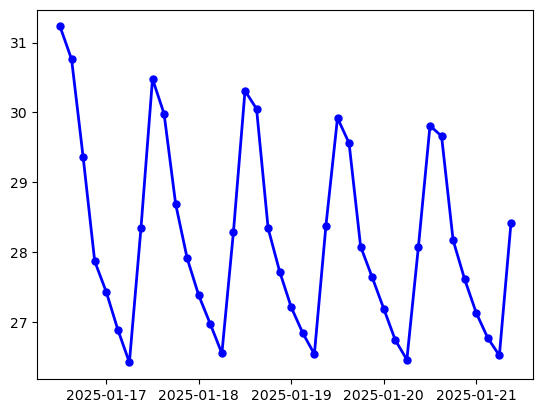

In [19]:
plt.plot(df['DateTime'], df['Temprature'], color='b', linestyle='-', linewidth=2, marker='o', markersize=5)

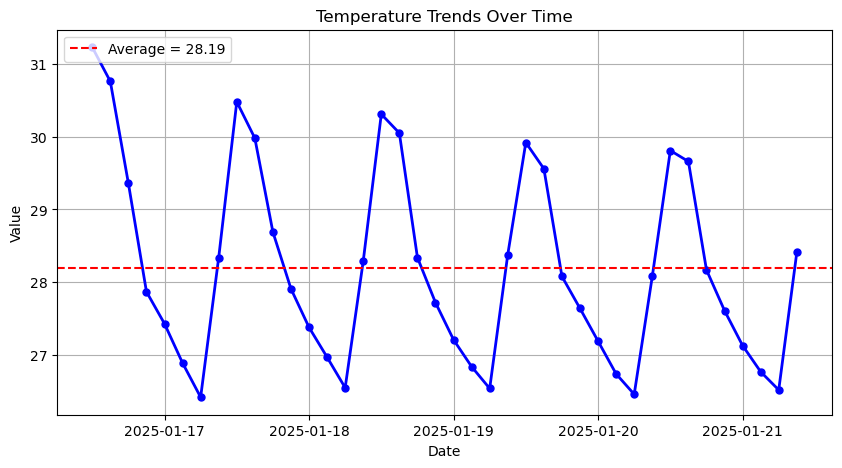

In [25]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Create a new figure with a specified size
plt.figure(figsize=(10, 5))

# Plotting the temperature data against DateTime
# 'marker' specifies the shape of the points, 'markersize' sets the size of the markers
plt.plot(df['DateTime'], df['Temprature'], color='b', linestyle='-', linewidth=2, marker='o', markersize=5)

# Adding a horizontal line to indicate the average temperature value
# 'label' is used for the legend, formatting the average value to two decimal places
plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average = {average_value:.2f}')

# Adding a title to the chart
plt.title("Temperature Trends Over Time")

plt.xlabel('Date')

plt.ylabel('Value')

plt.legend(loc='upper left')

plt.grid(True)

# Display the plot
plt.show()

In [27]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine 

In [29]:
# Database Crendetials 
username = 'input your username'
password = 'input your password'
database = 'myfirstdb'
host = 'localhost'  # or your server address
port = '****'  # or your actual port

In [31]:
#Establish a connection using SQLAlchemy engine
engine = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')

In [33]:
# creating a table name 
table_name = 'weather_data'

# loading data into the table 
df.to_sql(table_name, engine, if_exists = 'replace', index = False)

# Close the engine connection 
engine.dispose()
